In [2]:
import librosa
import IPython.display as ipd

A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the
amplitude part of the spectral components and observe it.

Original Signal


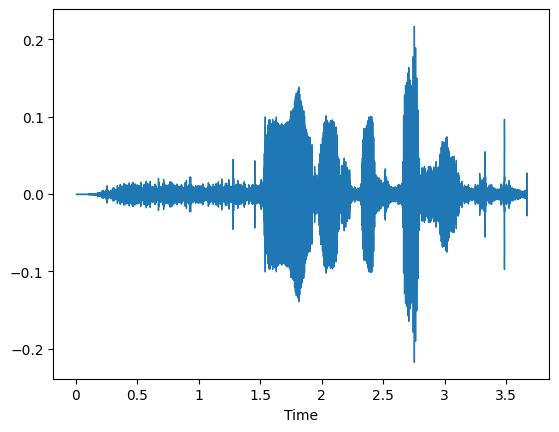

In [4]:
y, sr = librosa.load('/content/drive/MyDrive/mahesh.wav')
print('Original Signal')
librosa.display.waveshow(y)
ipd.Audio('/content/drive/MyDrive/mahesh.wav')

[ 1.0095448 +4.57966998e-15j -0.66686097+7.23628343e-02j
 -0.21210707-3.52930044e-01j ...  0.13175868+7.09803977e-02j
 -0.21210707+3.52930044e-01j -0.66686097-7.23628343e-02j]


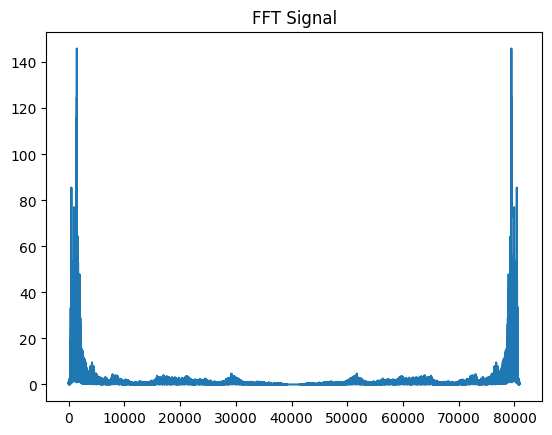

In [6]:
import numpy as np
import matplotlib.pyplot as plt
fft_s=np.fft.fft(y, n=None, axis=-1, norm=None)
print(fft_s)
amp=np.abs(fft_s)
plt.plot(amp)
plt.title('FFT Signal')
plt.show()

A2. Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal
from frequency domain to time domain. Compare the generated time domain signal with the
original signal.

[ 1.47451495e-17-4.33680869e-18j -1.47456042e-17+1.17088109e-17j
 -1.73485817e-18+8.67092299e-19j ...  4.16469527e-03+1.44101480e-17j
  2.71960767e-03-8.13289272e-18j  5.83142391e-04-2.04438350e-18j]


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


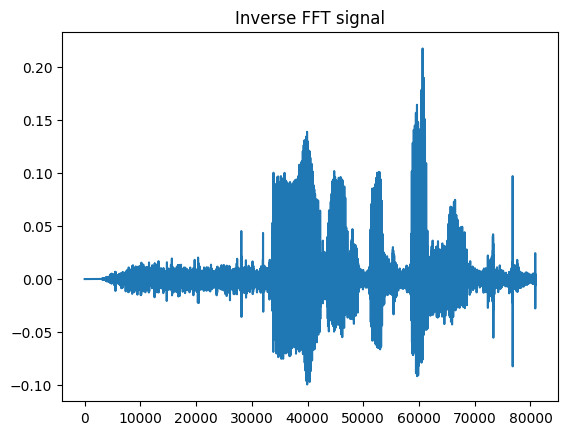

In [7]:
ifft_s=np.fft.ifft(fft_s, n=None, axis=-1, norm=None)
print(ifft_s)
plt.plot(ifft_s)
plt.title('Inverse FFT signal')
plt.show()

A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum
with the spectrum of the full signal.


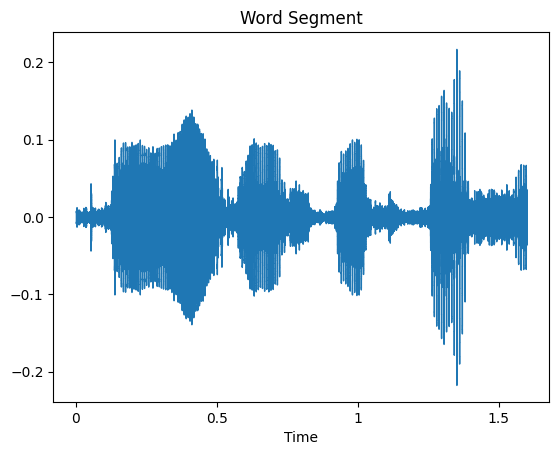

In [9]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt

y, sr = librosa.load('/content/drive/MyDrive/mahesh.wav')

# Define the word segment you want to analyze
starting_time = 1.4
ending_time = 3

# Extract the word segment
word_segment = y[int(starting_time * sr):int(ending_time * sr)]

librosa.display.waveshow(word_segment, sr=sr)
plt.title('Word Segment')

# Play the audio of the word segment
ipd.Audio(word_segment, rate=sr)

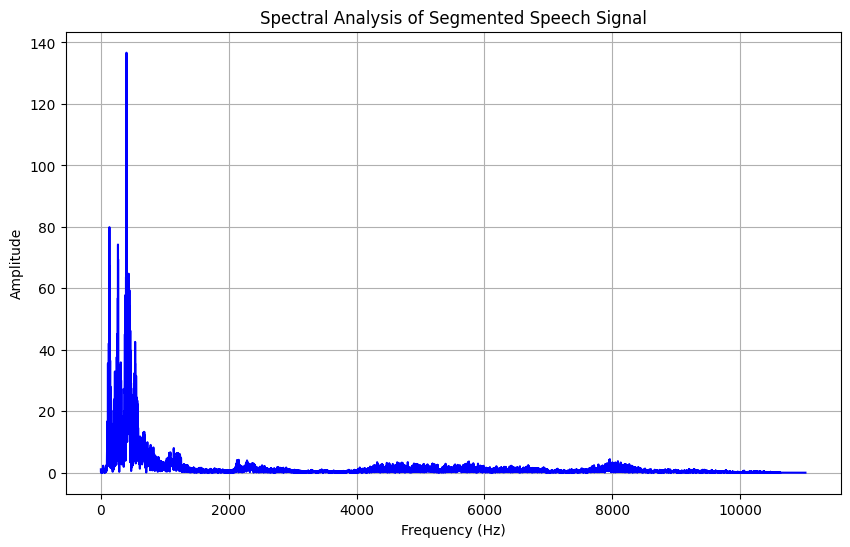

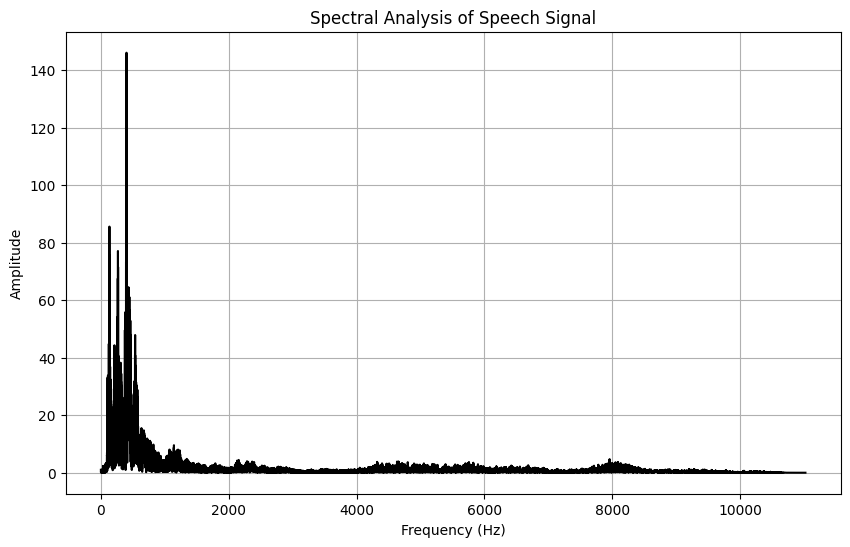

In [12]:
fft_output_seg = np.fft.fft(word_segment)
seg_freq = np.fft.fftfreq(len(word_segment), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(seg_freq[:len(seg_freq)//2], np.abs(fft_output_seg)[:len(seg_freq)//2],color='blue')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Segmented Speech Signal')
plt.grid(True)
plt.show()
fft_output = np.fft.fft(y)
f_freq = np.fft.fftfreq(len(y), 1/sr)
plt.figure(figsize=(10, 6))
plt.plot(f_freq[:len(f_freq)//2], np.abs(fft_output)[:len(f_freq)//2],color='black')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Spectral Analysis of Speech Signal')
plt.grid(True)
plt.show()

A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the
spectral components.

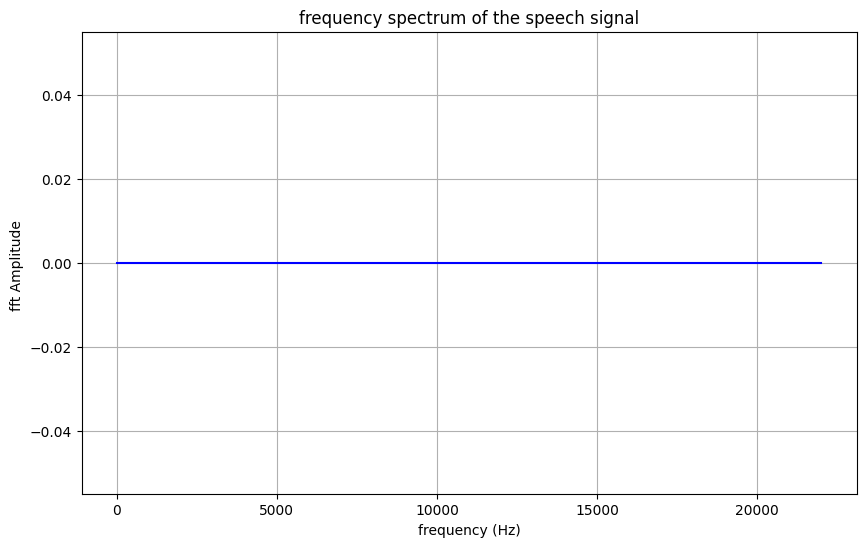

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft

# New sampling rate
sampling_rate = 44100

# New window duration in seconds
window_duration = 0.03

# Calculate the number of samples in the window
window_samples = int(window_duration * sampling_rate)

# Assuming 'y' is your signal array, replace it with your actual signal data
windowed_signal = y[:window_samples]

# Compute the FFT
X = fft(windowed_signal)

# Get the one-sided spectrum
n_oneside = window_samples // 2
frequencies = np.arange(n_oneside) * (sampling_rate / window_samples)
spectrum = np.abs(X[:n_oneside])

# Plot the frequency spectrum
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, 'b')
plt.xlabel('frequency (Hz)')
plt.ylabel('fft Amplitude ')
plt.title('frequency spectrum of the speech signal')
plt.grid(True)
plt.show()

A5. Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency
components using numpy.fft.rfft(). Stack these frequency components as columns in a
matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or
scipy.signal.stft() as well to achieve this.

In [16]:
import numpy as np
import librosa
# New sampling rate
sr = 44100
# New window length in samples (20 milliseconds)
window_length = int(0.02 * sr)
# New hop length (half of the window length)
hop_length = window_length // 2
# STFT
stft = librosa.stft(y, n_fft=window_length, hop_length=hop_length)
print(stft)
# Calculate the amplitude of STFT
amp_stft = np.abs(stft)
# Stack frequency components as columns in a matrix
frequency_matrix = np.transpose(amp_stft)
print(frequency_matrix)

[[ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j ...  5.81823848e-03+0.0000000e+00j
   4.90690395e-03+0.0000000e+00j -5.18632308e-02+0.0000000e+00j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j ... -1.47086487e-03+1.1456357e-05j
   1.27685431e-03-3.1034723e-03j  2.14585476e-02-5.6331716e-02j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j ... -5.52237825e-03-1.8372522e-03j
   2.48423568e-03+1.4780209e-02j  3.25461887e-02+3.7675373e-02j]
 ...
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j ...  1.27501887e-09-6.9175520e-08j
  -4.54982221e-08-4.5400370e-08j  1.31192020e-04-2.6527727e-05j]
 [ 0.00000000e+00+0.0000000e+00j  0.00000000e+00+0.0000000e+00j
   0.00000000e+00+0.0000000e+00j ...  5.62493589e-08+1.1244498e-08j
  -7.90987755e-08-3.2979617e-08j  1.32845325e-05+1.3296276e-04j]
 [ 0.00000

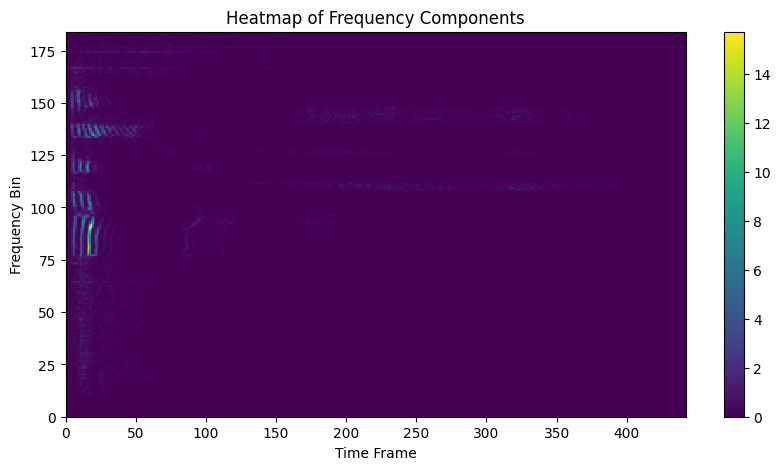

In [17]:
# heatmap plot
plt.figure(figsize=(10, 5))
plt.pcolormesh(frequency_matrix, vmin=0, vmax=np.max(amp_stft))
plt.xlabel("Time Frame")
plt.ylabel("Frequency Bin")
plt.title("Heatmap of the Frequency Components")
plt.colorbar()
plt.show()

A6. Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the
same duration. Compare the plots.

In [18]:
from scipy.signal import spectrogram

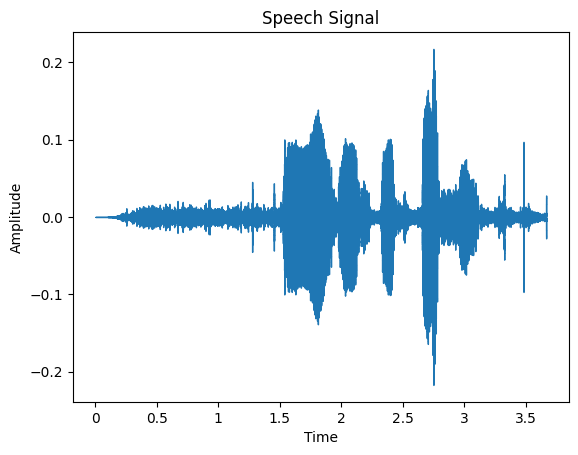

In [19]:
librosa.display.waveshow(y)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

<ipython-input-22-68c772e09fda>:2: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(S))


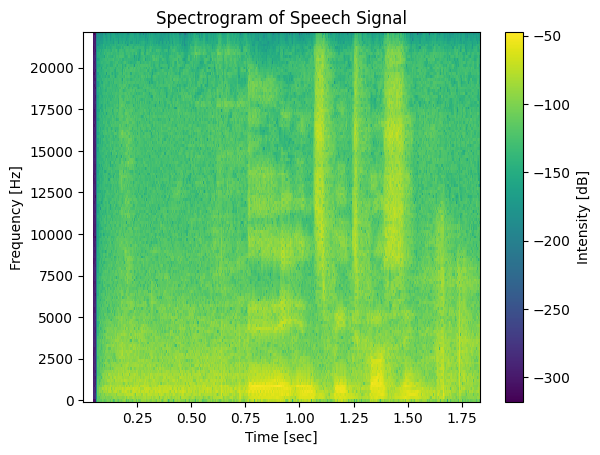

In [22]:
f, t, S = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(S))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()